### Unicode HOWTO

https://docs.python.org/3/howto/unicode.html
    
   This HOWTO discusses Python support for Unicode, 
and explains various problems that people commonly encounter when trying to work with Unicode.

* Python’s Unicode Support

* The String Type

    Since Python 3.0, the language features a **str** type that contain **Unicode** characters, meaning any string created using "unicode rocks!", 'unicode rocks!', or the triple-quoted string syntax is stored as Unicode.
    
The default encoding for Python source code is **UTF-8**, so you can simply include a Unicode character in a string literal

* Processing Text Files in Python 3

   http://python-notes.curiousefficiency.org/en/latest/python3/text_file_processing.html


In [1]:
fname="gbk.txt"
f = open(fname,'w',encoding="gbk")
f.write('中文-gbk')
f.close()

In [2]:
f = open(fname,'r',encoding="utf-8")
line=f.readline()
print(line)
f.close()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd6 in position 0: invalid continuation byte

In [ ]:
f = open(fname,'r',encoding="gbk")
line=f.readline()
print(line)
f.close()

In [ ]:
fname="utf-8.txt"
f = open(fname,'w',encoding="utf-8")
f.write('中文-utf-8')
f.close()

In [ ]:
f = open(fname,'r',encoding="gbk")
line=f.readline()
print(line)
f.close()

In [ ]:
f = open(fname,'r',encoding="utf-8")
line=f.readline()
print(line)
f.close()

In [ ]:
fname="default.txt"
f = open(fname,'w')
f.write('中文default')
f.close()

In [ ]:
f = open(fname,'r')
line=f.readline()
print(line)
f.close()

## how bad a fit is the line and how good is the quadratic fit?¶

#### numpy

* numpy.polyfit

Least squares polynomial fit.

Fit a polynomial 
```
p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
```
Returns a vector of coefficients p that minimises the squared error.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html

* numpy.poly1d 

A convenience class, used to encapsulate “natural” operations on polynomials

https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html
    

In [4]:
def PolyfitData(xv, yv,n):
    xv = np.array(xv)
    yv = np.array(yv)
    
    # polyfit
    p = np.polyfit(xv, yv, n,full=True)
    #Polynomial coefficients,residuals, rank, singular_values, rcond
    print(p)
    
    print('Polynomial coefficients=',p[0])
    print('residuals=',p[1])
    
    # numpy.poly1d 
    polycoff=p[0]
    polyfun=np.poly1d(polycoff)
    
    print('polyfun:',polyfun)
    print('polyfun order:',polyfun.order)
    print("polyfun coefficients",polyfun.c)
    
    return polyfun #Polynomial coefficients

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def plotPolyfitData(xv, yv,polyfun,r2=None):
    xv = np.array(xv)
    yv = np.array(yv)
    plt.plot(xv, yv, 'ro',
               label = 'row data')
    xvmin=min(xv)-1
    xvmax=max(xv)+1
    
    #xn=np.array(sorted(xv))
    xn=np.linspace(xvmin,xvmax,20)
    predictedyv=polyfun(xn)
    
    _label='Polynomial:'+str(polyfun)
   
    if r2!=None:
       _label +='\n R2=%.5f'%r2
    plt.plot(xn, predictedyv,
                 label = _label)
    
    plt.legend(loc = 'best')
    plt.show()   

(array([ 0.5       ,  3.00090909]), array([ 13.77629091]), 2, array([ 1.39407903,  0.23778908]), 2.4424906541753444e-15)
Polynomial coefficients= [ 0.5         3.00090909]
residuals= [ 13.77629091]
polyfun:  
0.5 x + 3.001
polyfun order: 1
polyfun coefficients [ 0.5         3.00090909]


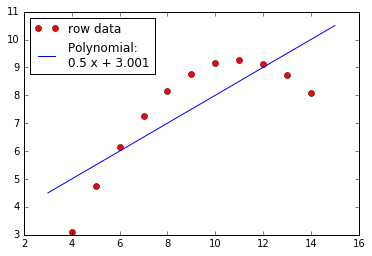

In [6]:
xv2=[10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0]
yv2=[9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]
polyfun=PolyfitData(xv2, yv2,1)
plotPolyfitData(xv2,yv2,polyfun)

(array([-0.12671329,  2.78083916, -5.99573427]), array([  2.23776224e-05]), 3, array([ 1.68569759,  0.39593524,  0.04072982]), 2.4424906541753444e-15)
Polynomial coefficients= [-0.12671329  2.78083916 -5.99573427]
residuals= [  2.23776224e-05]
polyfun:          2
-0.1267 x + 2.781 x - 5.996
polyfun order: 2
polyfun coefficients [-0.12671329  2.78083916 -5.99573427]


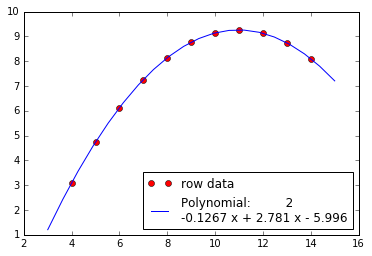

In [7]:
polyfun=PolyfitData(xv2, yv2,2)
plotPolyfitData(xv2,yv2,polyfun)

## Coefficient of Determination

Asking about <b>the goodness of a fit</b> is equivalent to asking about the accuracy of these predictions.

<b>The mean square error</b> is useful for comparing the <b>relative goodness</b> of two fits to the same data, 

it is <b>not particularly useful for getting a sense of the absolute goodness of a fit</b>.

We can calculate <b>the absolute goodness of a fit</b> using the <b>coefficient of determination</b>, often written as

$R^2$

Let:

* $y_i$ be the $i^{th}$ observed value,

* $p_i$ be the corresponding value predicted by model, and 

* $\mu$ be the mean of the observed values.

$R^2=1-\frac{\sum_{i}(y_i-p_i)^2}{\sum_{i}(y_i-\mu)^2}$

By comparing

<b>the estimation errors</b> (<b>RSS: residual sum of squares</b>,the numerator) 

$\sum_{i}(y_i-p_i)^2$

with

<b>the variability of the original values</b> ( <b>TSS: total sum of squares</b>,the denominator), 

$\sum_{i}(y_i-\mu)^2$

$R^2$ is intended to capture <b>the proportion of variability </b> in a data set that is accounted for by the statistical model provided by the fit.

Its <b>compactness</b> stems from the expressiveness of the operations on <b>arrays</b>.

In [8]:
def r2PolyfitData(xv, yv,polyfun):
    # mean 
    predicted_yv = polyfun(xv)  
    ymean = sum(predicted_yv)/len(predicted_yv) 
    print(ymean)
    # RSS: residual sum of squares
    rss = sum((predicted_yv-yv)**2)   
    # TSS: total sum of squares
    tss = sum((yv -  ymean)**2)   
    r2=1-rss / tss
    return r2

(array([ 0.5       ,  3.00090909]), array([ 13.77629091]), 2, array([ 1.39407903,  0.23778908]), 2.4424906541753444e-15)
Polynomial coefficients= [ 0.5         3.00090909]
residuals= [ 13.77629091]
polyfun:  
0.5 x + 3.001
polyfun order: 1
polyfun coefficients [ 0.5         3.00090909]
7.50090909091


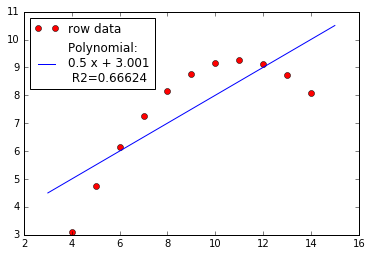

In [9]:
polyfun=PolyfitData(xv2, yv2,1)
r2=r2PolyfitData(xv2, yv2,polyfun)
plotPolyfitData(xv2,yv2,polyfun,r2)

(array([-0.12671329,  2.78083916, -5.99573427]), array([  2.23776224e-05]), 3, array([ 1.68569759,  0.39593524,  0.04072982]), 2.4424906541753444e-15)
Polynomial coefficients= [-0.12671329  2.78083916 -5.99573427]
residuals= [  2.23776224e-05]
polyfun:          2
-0.1267 x + 2.781 x - 5.996
polyfun order: 2
polyfun coefficients [-0.12671329  2.78083916 -5.99573427]
7.50090909091


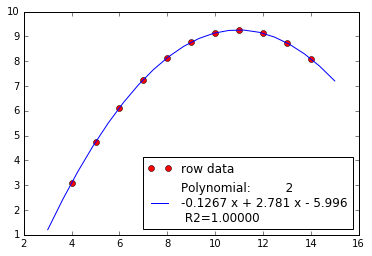

In [10]:
polyfun=PolyfitData(xv2, yv2,2)
r2=r2PolyfitData(xv2, yv2,polyfun)
plotPolyfitData(xv2,yv2,polyfun,r2)